In [2]:
import numpy as np
import matplotlib.pyplot as plt

### A) Wyznaczyć macierz przejść

In [3]:
P = [
    [0.64, 0.32, 0.04],
    [0.4, 0.5, 0.1],
    [0.25, 0.5, 0.25]
]

### B) Znaleść rozkład graniczny/stan stacjonarny na podstawie PN dla duzych N

In [4]:
n = 10**5
matrix = np.array(P)

matrix = np.linalg.matrix_power(matrix, n)

print(f"Rozkład graniczny macierzy P: {matrix[1]}")


Rozkład graniczny macierzy P: [0.51020408 0.40816327 0.08163265]


### C) Kryterium zbieżności

In [5]:
matrix = np.array(P)

epsilon = 1e-6
prev = np.eye(3)

for i in range(1, 1_000_000):
  current = np.linalg.matrix_power(matrix, i)
  diff = np.linalg.norm(current - prev)

  if diff < epsilon:
    print(f"Kryterium zbieżnosci znalezione po {i} iteracjach")
    break

  prev = current


Kryterium zbierznosci znalezione po 13 iteracjach


### D) Wykres

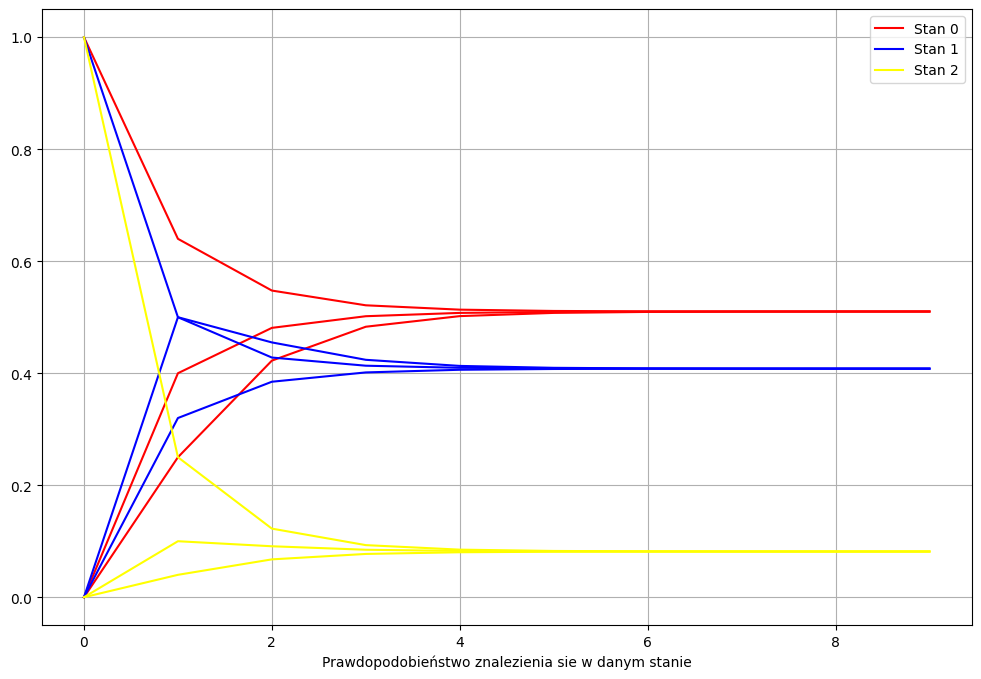

In [11]:
matrix = np.array(P)
steps = 10

initial_states = [
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1])
]

color = ['red', 'blue', 'yellow']

plt.figure(figsize=(12, 8))
for i, val in enumerate(initial_states):
  y_values = []
  for j in range(steps):
    y_values.append(np.linalg.matrix_power(matrix, j) @ val)

  y_values = np.array(y_values)
  plt.plot(range(steps), y_values[:, 0], color=color[i], label=f'Stan {i}')
  plt.plot(range(steps), y_values[:, 1], color=color[i])
  plt.plot(range(steps), y_values[:, 2], color=color[i])

plt.legend()
plt.xlabel('Numer kroku')
plt.xlabel('Prawdopodobieństwo znalezienia sie w danym stanie')
plt.grid(True)
plt.show()


